###  **Feature Selection – Filter Methods Only**

**Definition:**
Filter methods evaluate each feature **independently of the model** using statistical tests and rank them based on their relevance to the target.

---

### **Common Filter Techniques:**

1. **Correlation Coefficient**

   * Removes features highly correlated with each other.
   * Goal: Keep features with high correlation to target, low with each other.

2. **Chi-Square Test (χ²)**

   * Used for **categorical features**.
   * Measures the dependency between feature and target.

3. **ANOVA (F-test)**

   * Used for **continuous features** and a **categorical target**.
   * Measures variance between groups vs within groups.

4. **Mutual Information**

   * Measures how much information a feature gives about the target.
   * Works with both categorical and continuous variables.

---

### **Why Use Filter Methods:**

* Fast and scalable to large datasets.
* Model-independent.
* Useful as a **preprocessing step** before applying wrappers or embedded methods.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('human_activity_recognition_using_smartphone.csv')

In [52]:
df.shape

(7352, 563)

In [53]:
df.columns
df.drop('subject',axis=1,inplace=True)

In [54]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [55]:
np.round(df.Activity.value_counts()/df.shape[0] * 100,2)

,count
Activity,
LAYING,19.14
STANDING,18.69
SITTING,17.49
WALKING,16.68
WALKING_UPSTAIRS,14.59
WALKING_DOWNSTAIRS,13.41


In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
x = df.drop('Activity',axis=1)
y = df.Activity

In [58]:
encode = LabelEncoder()
y = encode.fit_transform(y)
# y.sample(5)

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
# shape
print('rows for training\t',x_train.shape[0],'\nrows for testing\t',x_test.shape[0])

rows for training	 5881 
rows for testing	 1471


In [61]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(x_train,y_train)
lr

LogisticRegression(multi_class='multinomial')

In [62]:
y_pred = lr.predict(x_test)
y_pred

array([4, 4, 3, ..., 1, 1, 1])

In [63]:
print('accuracy score\t',np.round(accuracy_score(y_test,y_pred)*100,2))

accuracy score	 98.03


In [64]:
# when we will have 100 columns instead 561

In [65]:
# dropping duplicate features
df.T.duplicated().sum()

np.int64(21)

We have around 21 duplicate columns

In [66]:
x_train = x_train.loc[:, ~x_train.T.duplicated()]
x_test = x_test.loc[:, ~x_test.T.duplicated()]

In [67]:
# variance threshold
# constant
# quasi constant feature

### 1. Variance Threshold
A feature selection technique that removes features (columns) with low variance.

#### 2. Constant Feature
A feature that has the same value in every row

#### 3. Quasi-Constant Feature
A feature that has the same value in almost all rows (e.g., 99% same).

In [68]:
# (x_train.var()<0.05).sum()
# we have around 191 columns

In [69]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)
sel

VarianceThreshold(threshold=0.05)

In [70]:
sel.fit(x_train)

VarianceThreshold(threshold=0.05)

In [71]:
sel.get_support().sum()

np.int64(349)

In [72]:
cols = np.array(x_train.columns[sel.get_support()])
# # print(cols)
# cols

In [73]:
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

In [74]:
x_train = pd.DataFrame(x_train,columns=cols)
x_test = pd.DataFrame(x_test,columns=cols)

In [75]:
print('number of columns left\t',x_train.shape[1])

number of columns left	 349


**Points to consider before applying a Variance Threshold** for feature selection:

---
Perfect — the image you've shared provides a detailed and **accurate breakdown** of the **limitations and considerations** when using Variance Threshold for feature selection.

Here’s a **simplified summary** of each point in your own words:

---

### 1. **Ignores Target Variable**

* Variance Threshold is **univariate**, so it looks at each feature **alone** without considering how it affects the target.
* Risk: It might keep useless features (high variance, no target relevance) or remove important ones (low variance, strong target relevance).

---

### 2. **Ignores Feature Interactions**

* It doesn’t consider **combinations** of features.
* A low-variance feature could still be **valuable when paired** with another feature.

---

### 3. **Sensitive to Data Scaling**

* Features with large values naturally show **higher variance**.
* Always **standardize or normalize** the data before applying Variance Threshold, especially when feature ranges differ.

---

###  4. **Arbitrary Threshold Value**

* There’s **no fixed rule** for setting the variance cutoff.
* You need to **experiment** or rely on domain knowledge to set an appropriate threshold.
* What’s “low” variance in one dataset might be “normal” in another.


In [76]:
# correlation



## 1. **Correlation**

* Measures the **linear relationship** between two variables.
* Can be:

  * **Feature vs Feature** (e.g., `X1` vs `X2`) ➝ checks for **redundancy**
  * **Feature vs Target** (e.g., `X1` vs `y`) ➝ checks for **predictive power**

---

## 2. **Multicollinearity**

* Occurs when **two or more features (X1, X2, X3)** are **highly correlated with each other**.
* They **don’t add new information** to the model.
* Causes:

  * **Unstable coefficients** in linear models
  * **Reduced interpretability**
  * May cause overfitting in some cases

---

### Example:

| Feature | Correlation                      |
| ------- | -------------------------------- |
| X1 ↔ X2 | High (Multicollinearity)         |
| X1 → y  | Strong (useful)                  |
| X2 → y  | Strong (but redundant due to X1) |

You don't want multiple features telling the model **the same thing**.

---

## 3. **Feature vs Target (`X1 → y`, `X2 → y`)**

This is about **predictive power**:

* `X1 → y` = Feature X1 is correlated with the target → useful!
* `X2 → y` = Feature X2 is also useful on its own

But if **X1 and X2 are also highly correlated**, they may cause **multicollinearity**.

---

## 🔁 Summary:

| Concept           | Focus                                  | Example                      |
| ----------------- | -------------------------------------- | ---------------------------- |
| Correlation       | Relationship between 2 variables       | `X1 ↔ X2` or `X1 → y`        |
| Multicollinearity | High correlation between features      | `X1 ↔ X2` → redundant        |
| Feature vs Target | How useful a feature is for prediction | `X1 → y`, `X2 → y`, `X3 → y` |

---

### 🔧 How to Handle Multicollinearity:

* Use **correlation matrix** to identify redundant features
* Use **VIF (Variance Inflation Factor)**: high VIF = high multicollinearity
* Drop or combine redundant features


In [77]:
# plt.figure(figsize=(12,30))
# sns.heatmap(x_train.corr())
# plt.show()

# x_train.corr()

In [78]:
corr_matrix = x_train.corr()
corr_matrix

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,-0.061190,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,-0.103492,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,-0.095347,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,-0.055098,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,-0.101235,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.023914,-0.002241,-0.010535,0.024098,-0.005865,-0.014838,0.029230,-0.000207,-0.023622,-0.008700,...,-0.024274,0.031310,0.021829,-0.006297,0.013870,1.000000,-0.104987,-0.009878,-0.006218,-0.011178
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.000472,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,0.077000,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,-0.093215,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205


In [79]:
columns = corr_matrix.columns
columns_to_drop = []

# loop for every column

for i in range(len(columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:
            # Drop the second column (i), keep the first (j)
            colname = columns[i]
            if colname not in columns_to_drop:
                columns_to_drop.append(colname)

In [80]:
print(len(set(columns_to_drop)))

columns_to_drop = set(columns_to_drop)

212


In [81]:
x_train.drop(columns_to_drop,axis=1,inplace=True)
x_test.drop(columns_to_drop,axis=1,inplace=True)

In [82]:
print('Now we are left with',x_train.shape[1],'columns')

Now we are left with 137 columns


### Disadvantages of Correlation:

1. **Linearity Assumption**
   Correlation measures **only linear relationships** between two variables.
   → If the relationship is **non-linear**, the correlation coefficient can be **misleading**.

2. **Doesn’t Capture Complex Relationships**
   Correlation checks the relationship between **only two variables at a time**.
   → It fails to capture **interactions involving multiple variables**.

3. **Threshold Determination**
   Just like variance threshold, deciding what is a "high" or "low" correlation is **subjective**.
   → It can vary based on **problem context** or dataset.

4. **Sensitive to Outliers**
   Correlation is **easily influenced by extreme values**.
   → Even a few outliers can **distort the correlation coefficient**.


In [83]:
# ANOVA

### ANOVA (Analysis of Variance)
---

### 🔹 What is ANOVA?

**ANOVA** is a **statistical test** used to determine **whether there are significant differences between the means of two or more groups**.

* Full Form: **Analysis of Variance**
* It helps answer:
    *Do different groups have different means?*

---

### When to Use ANOVA?

Use ANOVA when:

* You have **one categorical independent variable** (e.g., gender, education level)
* And **one continuous dependent variable** (e.g., salary, marks)
* You want to check **if the groups differ significantly**

---

### Example:

**Problem**: Does education level affect salary?
**Groups**: High School, Graduate, Postgraduate
**Test**: One-Way ANOVA (1 factor: Education)

---

### How It Works (Intuition):

ANOVA splits the total variation in your data into:

* **Between-group variance** (difference in group means)
* **Within-group variance** (random noise or error)

Then it compares them:

* If **between > within**, then groups likely differ significantly

---

### 🔹 Hypotheses:

* **Null Hypothesis (H₀)**: All group means are equal
* **Alternate Hypothesis (H₁)**: At least one group mean is different

---

### 🔹 Types of ANOVA:

| Type              | Description                             |
| ----------------- | --------------------------------------- |
| **One-Way ANOVA** | 1 categorical variable (1 factor)       |
| **Two-Way ANOVA** | 2 categorical variables (factors)       |
| **MANOVA**        | Multiple continuous dependent variables |




## ANOVA for Feature Selection in Classification

### When to Use:

* Your **target variable is categorical** (e.g., binary or multi-class)
* Your **features are numerical**
* Goal: **Select top features that best separate the classes**

---

### What It Does:

It calculates an **F-score** for each feature, measuring how well it distinguishes between target classes.
**Higher F-score = more important feature**


### Final Tip:

* Use ANOVA for **classification**, not regression.
* For regression tasks, use `f_regression` instead.



In [84]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [85]:
sel = SelectKBest(f_classif,k=100)
sel.fit(x_train,y_train)

SelectKBest(k=100)

In [86]:
cols = x_train.columns[sel.get_support()]

In [87]:
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)
x_train = pd.DataFrame(x_train,columns=cols)
x_test = pd.DataFrame(x_test,columns=cols)

In [88]:
print('we are left with',x_train.shape[1],'columns')

we are left with 100 columns


###  Disadvantages of ANOVA (for Feature Selection)

1. **Assumes Normal Distribution**

   * ANOVA works only if the data in each group follows a normal distribution.
   * Doesn’t work well on skewed data.

2. **Equal Variance Required**

   * Assumes all groups have the same variance (homoscedasticity).
   * If variances differ, results can be wrong.

3. **Independent Observations Needed**

   * Assumes all observations are independent.
   * Not suitable for time-series or nested data.

4. **Sensitive to Outliers**

   * Even a single outlier can affect the F-score and give false results.

5. **Ignores Feature Interactions**

   * ANOVA checks features one by one and doesn’t consider how features work together.

In [92]:
lr = LogisticRegression(multi_class='multinomial')
lr

LogisticRegression(multi_class='multinomial')

In [93]:
lr.fit(x_train,y_train)


LogisticRegression(multi_class='multinomial')

In [94]:
y_pred = lr.predict(x_test)
print('Accuracy score\t',np.round(accuracy_score(y_test,y_pred)*100,2))

Accuracy score	 97.01


### Chi-Square Test for Feature Selection

**Chi-Square (χ²)** is a **statistical test** used as a filter method to select **categorical features** relevant to the target variable.

---

### **When to Use:**

* Feature must be **categorical (or discretized)**
* Target variable must be **categorical**
* Works best for **classification problems**

---

### **How It Works:**

* It tests whether **two categorical variables** (feature and target) are **independent or related**.
* Higher the chi-square score → more likely the feature is **dependent** on the target → more **important**.

---

### **Steps:**

1. Create a **contingency table** between feature and target.
2. Calculate the **chi-square statistic**.
3. Rank features based on the score.
4. Select top features with highest scores.


### **Limitations:**

* Works only with **categorical data** (must discretize numeric features first)
* Doesn’t capture **feature interactions**
* Sensitive to **sample size** and **sparse data**


In [99]:
titanic = sns.load_dataset('titanic')
titanic.columns
titanic = titanic[['pclass', 'sex', 'sibsp', 'parch',
       'embarked','survived']]

In [100]:
titanic.head()

,pclass,sex,sibsp,parch,embarked,survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [103]:
ct = pd.crosstab(titanic['survived'],titanic['sex'],margins=True)
ct

sex,female,male,All
survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [104]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=np.float64(263.05057407065567), pvalue=np.float64(1.0036732821369117e-55), dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

<Axes: >

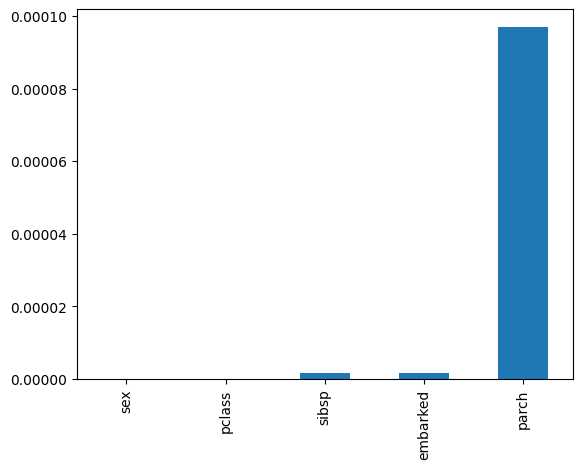

In [106]:

score = []

for feature in titanic.columns[:-1]:

    ct = pd.crosstab(titanic['survived'], titanic[feature])


    p_value = chi2_contingency(ct)[1]  # Extract p-value
    score.append(p_value)

pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

Top three Features are sex, pclass, sibsp


### Disadvantages of Chi-Square Test

1. **Categorical Data Only**

   * Works only with **categorical variables**.
   * Not suitable for continuous data unless converted (which can lead to **loss of information**).

2. **Assumes Independent Observations**

   * Assumes data points are independent.
   * Not ideal for **time series** or **nested data**.

3. **Needs Large Sample Size**

   * Requires a **sufficiently large** dataset.
   * Becomes **unreliable** if any category has a count < 5.

4. **Ignores Feature Interactions**

   * Only checks **individual** features.
   * Misses out on important **feature combinations**.



In [ ]:
# hi, I am Anshum Banga
# Reach me out on Linkedin at www.linkedin.com/in/anshumbanga